In [27]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
eps = np.finfo(float).eps
from sklearn import linear_model
import copy
from sklearn.model_selection import KFold

In [28]:
df=pd.read_csv('../input_data/data.csv')
y=df['Chance of Admit ']
df=df.drop(['Serial No.','Chance of Admit '],axis=1)
x = (df - df.mean())/df.std()

In [29]:
x.insert(0, 'x0', np.ones(len(x)))

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [31]:
def gradient_descent(x,y,theta,alpha,iters):
    for i in range(iters):
        gradient = (np.dot(theta,x.T) - y.values)  

        theta = theta - (alpha/len(y))*np.dot(gradient,x)
    return theta
def prediction(weights,xtest):
    pred=[]
    for row in range(len(xtest)):
        val=np.dot(weights,xtest.iloc[row])
        pred.append(val)
    return pred

In [32]:
#different values of K
k=[2,3,4,5,6,7,8,9,10]

In [33]:
er=[]
er2=[]
for i in k:
    kf= KFold(i)
    error=[]
    error2=[]
    for train_index, test_index in kf.split(x):
        xxtrain, xxtest, yytrain, yytest = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        alpha = 0.01
        iters = 1000
        theta=[1,0,0,0,0,0,0,0]
        new_theta=gradient_descent(xxtrain, yytrain, theta, alpha, iters)
        pred=prediction(new_theta,xxtest)
        error2.append(mean_squared_error(yytest,pred))
        model=LinearRegression()
        model.fit(xxtrain,yytrain)
        pp=model.predict(xxtest)
        error.append(mean_squared_error(yytest,pp))
    er.append(np.mean(error))
    er2.append(np.mean(error2))

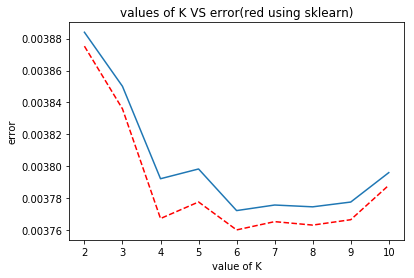

In [34]:
plt.plot(k,er2) # Create line plot with red dashed line
plt.plot(k,er,'r--') #using scikit learn
plt.title('values of K VS error(red using sklearn)')
plt.xlabel('value of K')
plt.ylabel('error')
plt.show()

Three common tactics for choosing a value for k are as follows:

### Representative:
The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.
### k=10: 
The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance.
### k=n: 
The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.


To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.